In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("/Bird Strikes data (1).csv")

In [5]:
data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/2000 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/2001 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/2001 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/2002 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/2003 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Record ID,25558.0,253916.085609,38510.453382,1195.0,225783.75,248749.0,269168.75,321909.0
Wildlife: Number Struck Actual,25558.0,2.691525,12.793975,1.0,1.00,1.0,1.00,942.0
Number of people injured,25558.0,0.001056,0.050420,0.0,0.00,0.0,0.00,6.0


In [7]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Effect: Impact to flight', 'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remarks', 'Wildlife: Size', 'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Is Aircraft Large?'],
      dtype='object')
Numerical Variables:
['Record ID', 'Wildlife: Number Struck Actual', 'Number of people injured']


Record ID
Skew : -0.52


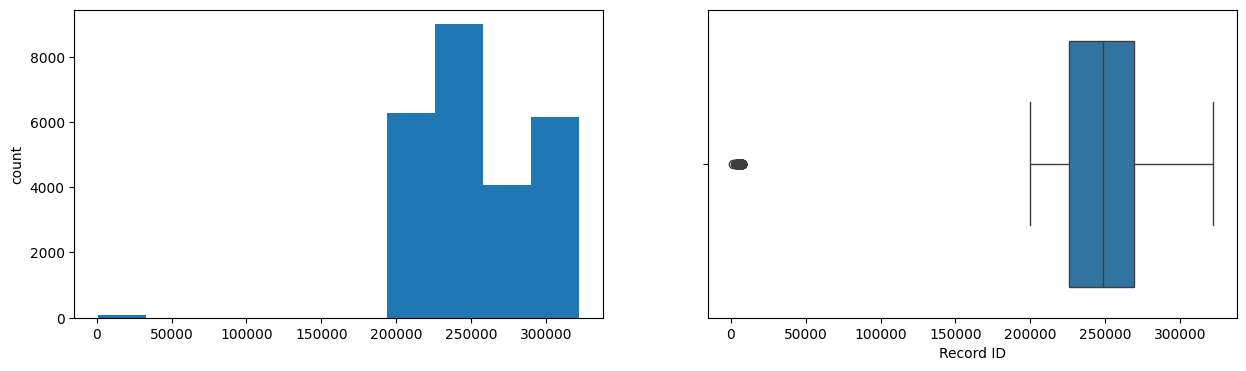

Wildlife: Number Struck Actual
Skew : 43.8


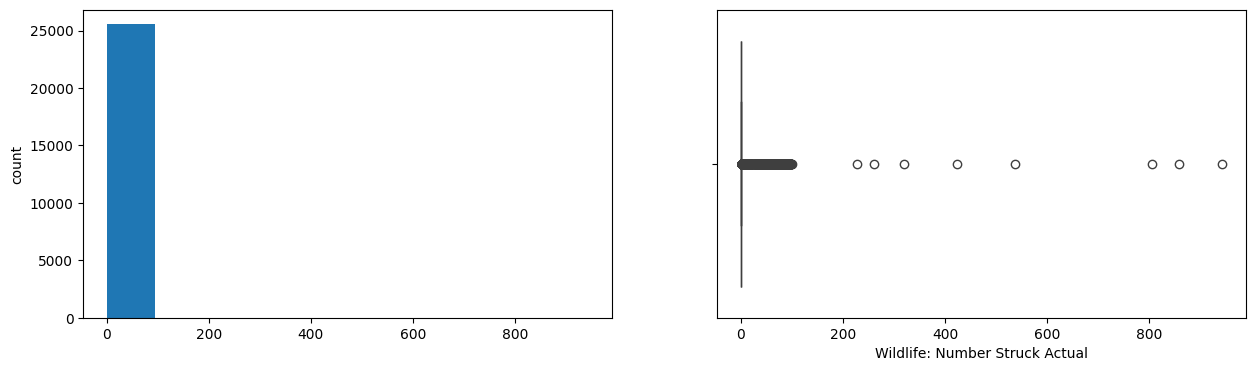

Number of people injured
Skew : 79.62


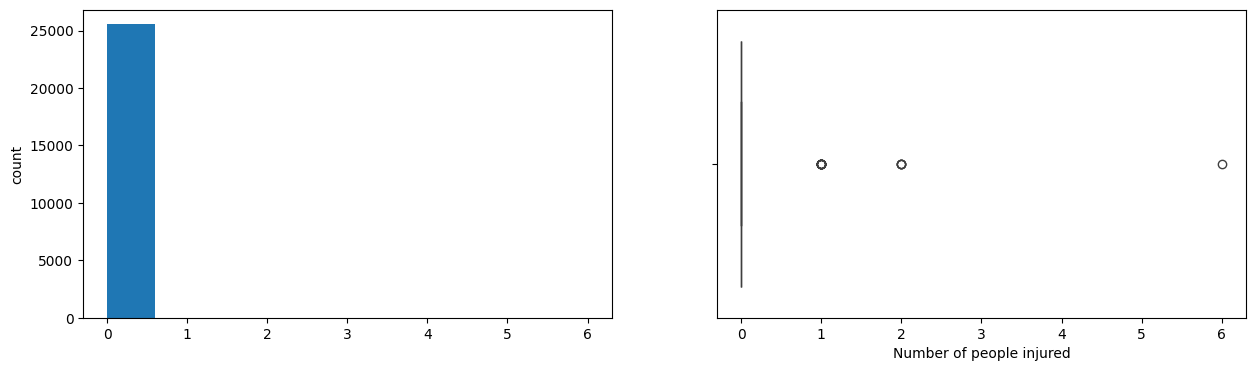

In [8]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

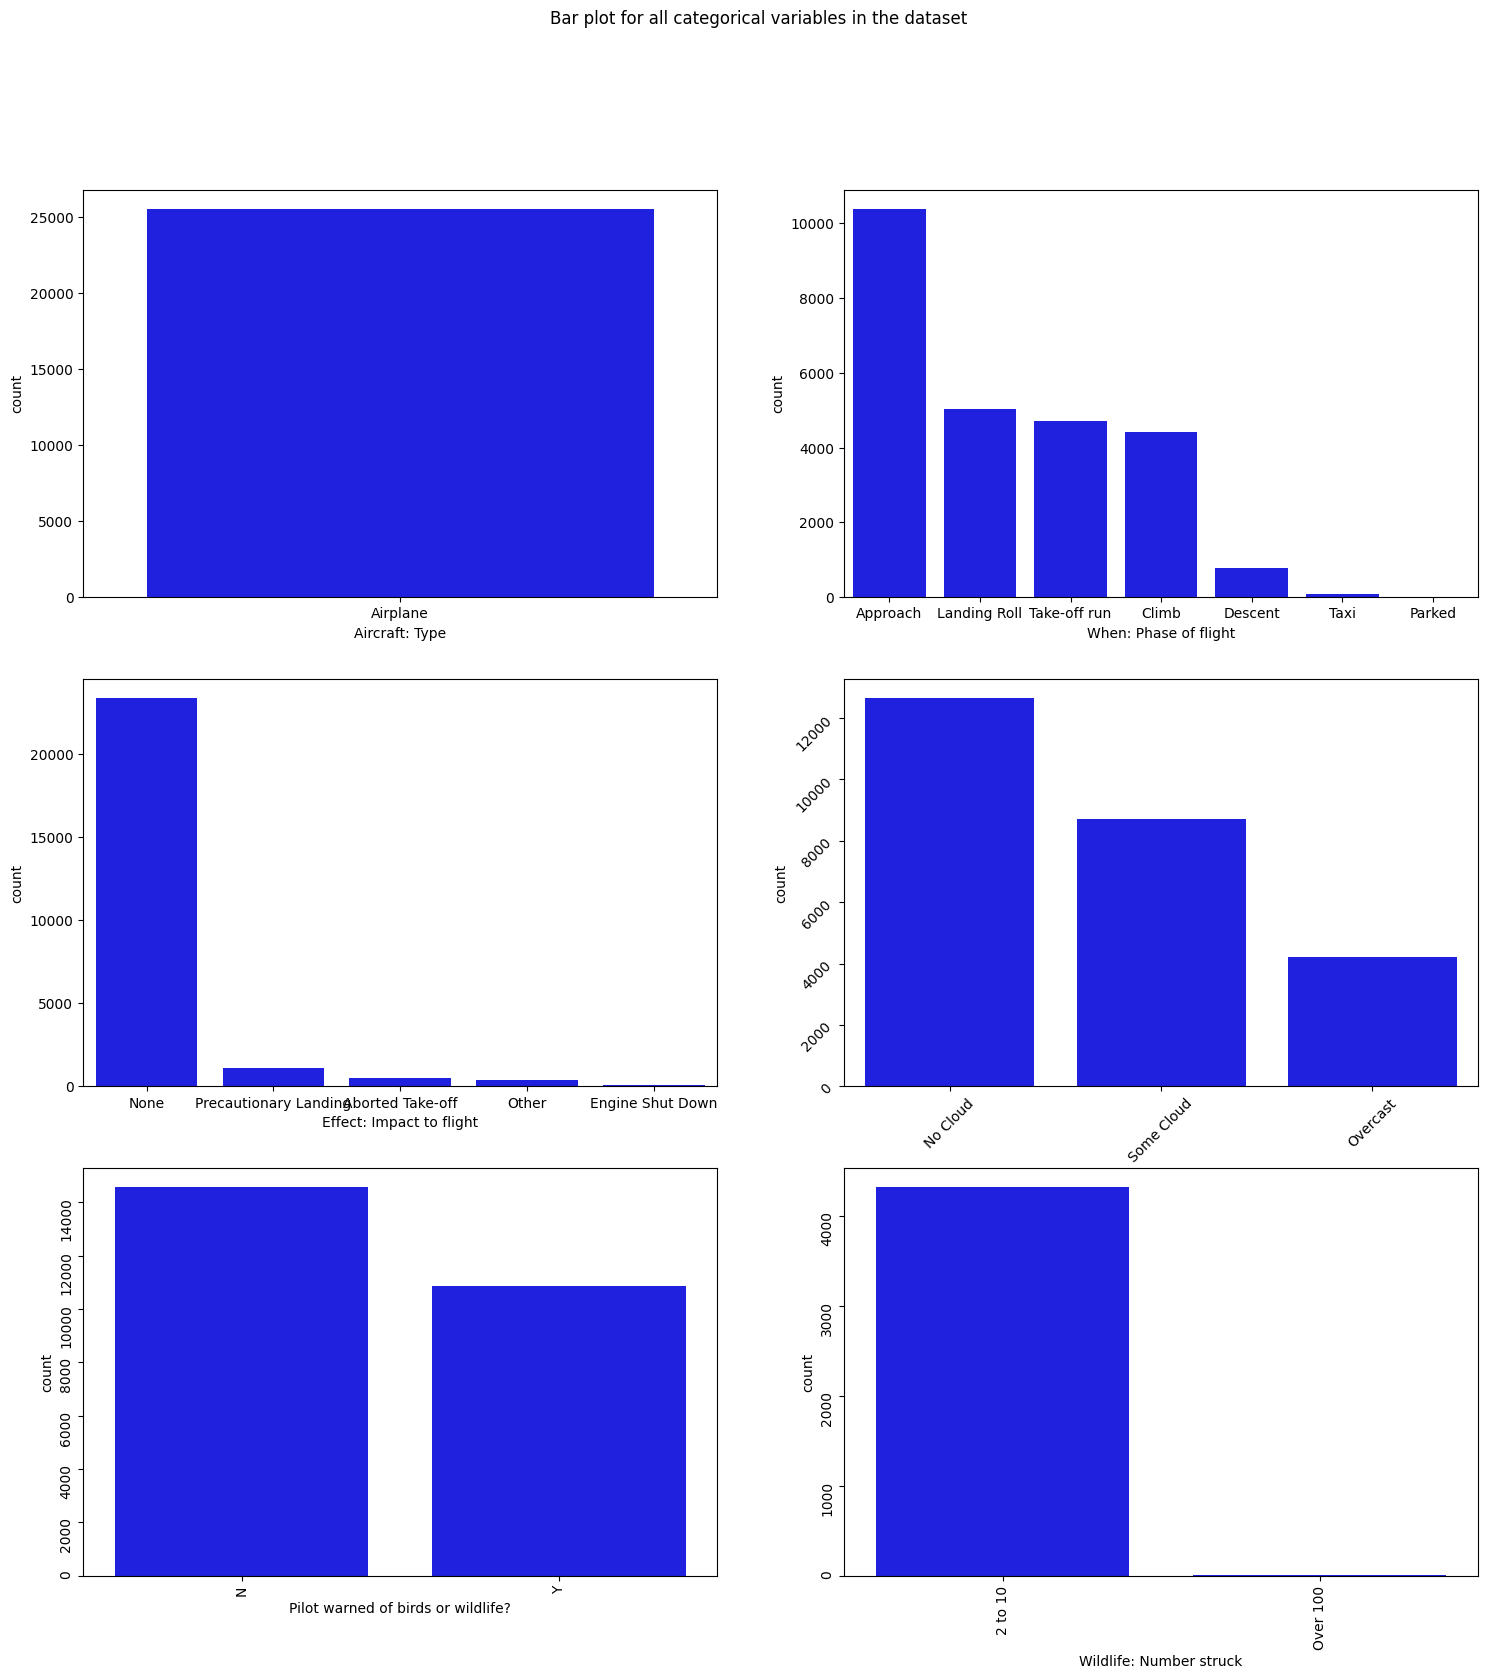

In [10]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Aircraft: Type', data = data, color = 'blue',
              order = data['Aircraft: Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'When: Phase of flight', data = data, color = 'blue',
              order = data['When: Phase of flight'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Effect: Impact to flight', data = data, color = 'blue',
              order = data['Effect: Impact to flight'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Conditions: Sky', data = data, color = 'blue',
              order = data['Conditions: Sky'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Pilot warned of birds or wildlife?', data = data, color = 'blue',
              order = data['Pilot warned of birds or wildlife?'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Wildlife: Number struck', data = data, color = 'blue',
              order = data['Wildlife: Number struck'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

<Figure size 1300x1700 with 0 Axes>

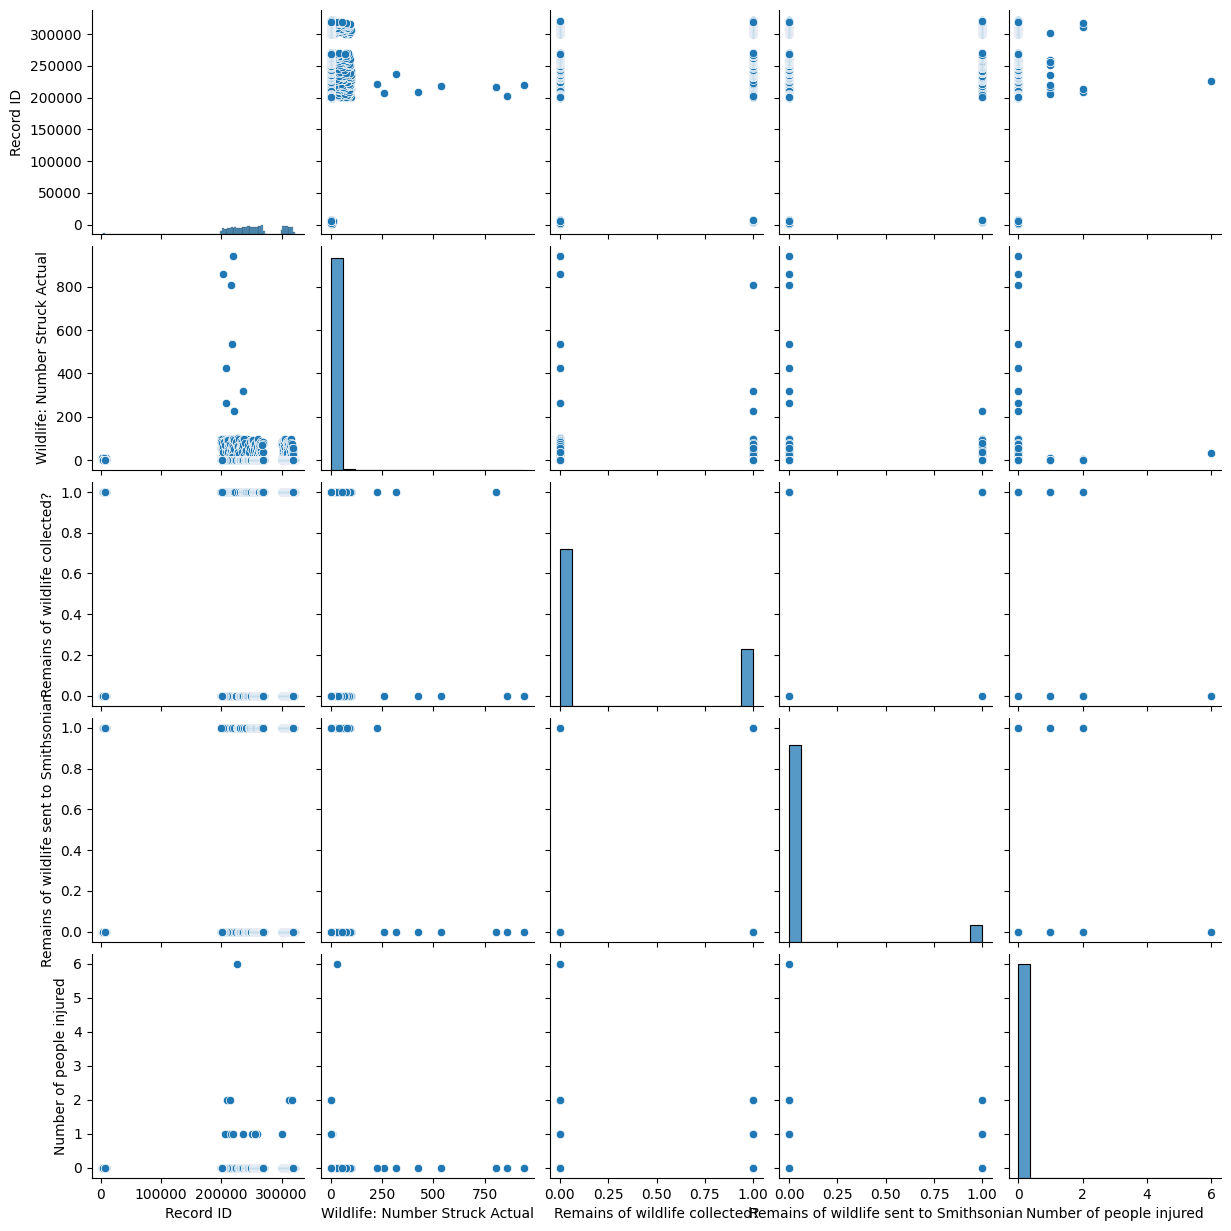

In [17]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop([],axis=1))
plt.show()